In [55]:
#Installations
!apt install gdal-bin python-gdal python3-gdal 
!pip install rasterio
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-cxs_adul
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-cxs_adul
  Created wheel for geopandas: filename=geopandas-0.7.0+73.g18dca3f-py2.py3-none-any.whl size=959081 sha256=decde428da0a45da67158fb16520ff13610f9470eddf277f96fe217ee6bc2ca7
  Stored in directory: /tmp/pip-ephem-wheel-cache-dqyui15m/wheels/91/24/71/376c9c67192694168352

In [56]:
!pip install mapclassify

     |████████████████████████████████| 51kB 1.7MB/s 
  Created wheel for mapclassify: filename=mapclassify-2.2.0-cp36-none-any.whl size=47028 sha256=9f0074b277de1e644156b016d93356cb76ed594c59ee6b31b07126e1c1d7b20c
  Stored in directory: /root/.cache/pip/wheels/96/0c/c1/b2bce9fc10da2e6c6befc9fe5929adca7c71b7c4abd1fc42f0
Successfully built mapclassify


In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
import matplotlib.pyplot as plt

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
chm = rio.open("C:/Projetos/Vant_Rondonia_Embrapa/03Dez2019/Teste_Kmeans/CHM_Kmeans_UTM.tif")

In [6]:
chm.width

743

In [7]:
chm.height

500

In [8]:
trees = gpd.read_file("C:/Projetos/Vant_Rondonia_Embrapa/03Dez2019/Teste_Kmeans/Trees_PrevOnly_KmeansArea.shp")
trees = trees[["FID", "id", "Area", "geometry"]]
trees.head()

,FID,id,Area,geometry
0,1108,None,5.125,"POLYGON ((297609.530 8943742.213, 297609.530 8..."
1,1110,None,3.925,"POLYGON ((297613.323 8943742.220, 297613.323 8..."
2,1111,None,0.685,"POLYGON ((297614.718 8943741.266, 297614.198 8..."
3,1116,None,18.323,"POLYGON ((297606.028 8943740.676, 297608.071 8..."
4,1117,None,6.280,"POLYGON ((297610.697 8943738.022, 297612.739 8..."


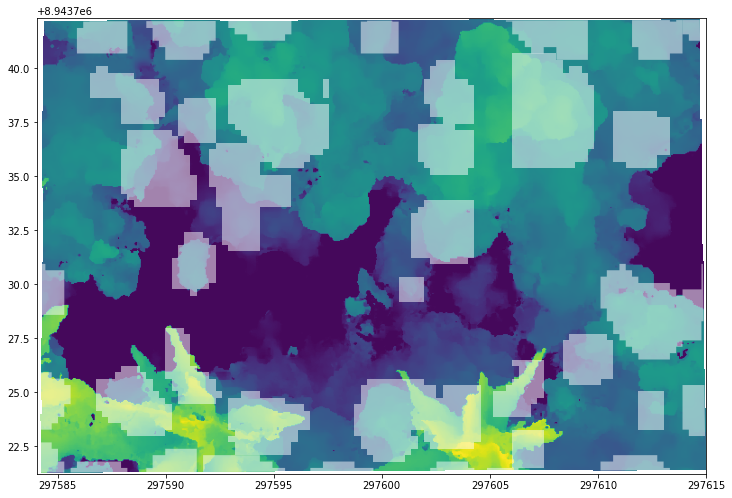

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))
show(chm, ax=ax)
trees.plot(ax=ax, color="white", alpha=.50)
plt.show();

In [10]:
masked, mask_transform = mask(dataset=chm, 
                              shapes=trees.geometry, crop=True)

In [11]:
masked

array([[[-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        ...,
        [-3.4028235e+38,  9.9294128e+00,  9.9333496e+00, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        [-3.4028235e+38,  9.9699936e+00,  9.9871902e+00, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        [-3.4028235e+38,  1.0112541e+01,  1.0109093e+01, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38]]], dtype=float32)

In [29]:
masked.shape

(1, 497, 739)

In [13]:
masked.mean()

C:\Users\Rafael\anaconda3\envs\canopy_evaluation\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


-inf

In [14]:
masked.max()

13.412552

In [15]:
masked.min()

-3.4028235e+38

In [16]:
chm.crs

CRS.from_epsg(32720)

In [17]:
trees.crs

<Projected CRS: EPSG:32720>
Name: WGS 84 / UTM zone 20S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - S hemisphere - 66°W to 60°W - by country
- bounds: (-66.0, -80.0, -60.0, 0.0)
Coordinate Operation:
- name: UTM zone 20S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
def derive_stats(geom, data=chm, **mask_kw):
    masked, mask_transform = mask(dataset=data, shapes=(geom,),
                                  crop=True, all_touched=True, filled=True)
    return masked

In [25]:
trees['max_chm'] = trees.geometry.apply(derive_stats).apply(np.max)

In [26]:
trees['min_chm'] = trees.geometry.apply(derive_stats).apply(np.min)

In [27]:
trees['mean_chm'] = trees.geometry.apply(derive_stats).apply(np.mean)

In [28]:
trees.head()

,FID,id,Area,geometry,max_chm,min_chm,mean_chm
0,1108,None,5.125,"POLYGON ((297609.530 8943742.213, 297609.530 8...",7.371162,-3.402823e+38,-inf
1,1110,None,3.925,"POLYGON ((297613.323 8943742.220, 297613.323 8...",6.045158,-3.402823e+38,-inf
2,1111,None,0.685,"POLYGON ((297614.718 8943741.266, 297614.198 8...",5.816750,-3.402823e+38,-inf
3,1116,None,18.323,"POLYGON ((297606.028 8943740.676, 297608.071 8...",9.275139,-3.402823e+38,-inf
4,1117,None,6.280,"POLYGON ((297610.697 8943738.022, 297612.739 8...",5.720383,-3.402823e+38,-inf


In [28]:
trees.to_file("C:/Projetos/Vant_Rondonia_Embrapa/09Dez2019/Deep_Learning_Arvores_Degrad15x/Trees_Final_CNN09Dez2019_128_150epochs_AOI_Height.shp")